In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import glob
import os
import cv2
from patchify import patchify
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import img_as_bool, io, color, morphology
import matplotlib.pyplot as plt
import random

from skimage import morphology, img_as_ubyte, color
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from tensorflow.keras.models import load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

### This takes the largest areas from connected components from the test prediction image, taking the 4 biggest areas.

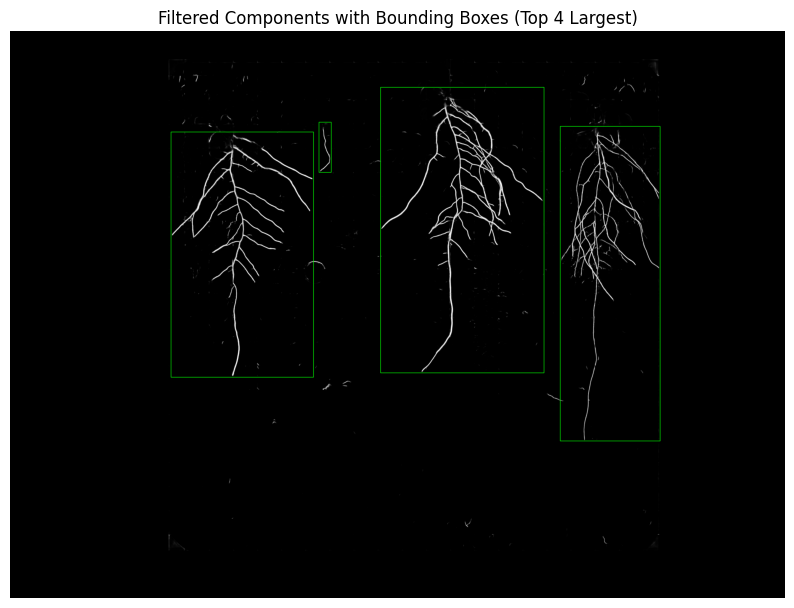

In [6]:
def display_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = 'task5_test_image_prediction_emil_231007.png' 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Noise reduction with Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# adaptive Thresholding
thresh = cv2.adaptiveThreshold(blurred, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

#  closing to close small holes within the foreground
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# dind connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closing, connectivity=8)

# sort components based on area, skipping the background
sorted_stats = sorted(stats[1:], key=lambda x: x[cv2.CC_STAT_AREA], reverse=True)

output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# looping through the top 4 largest components only
for i in range(min(4, len(sorted_stats))): 
    x, y, w, h, area = sorted_stats[i]
    cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

display_image(output_image, "Filtered Components with Bounding Boxes (Top 4 Largest)", cmap='viridis')

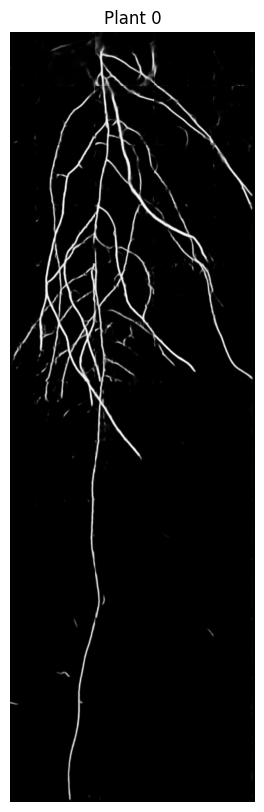

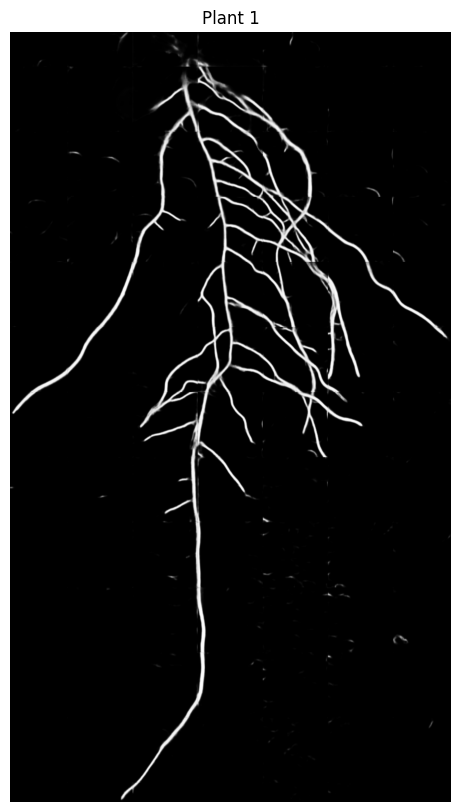

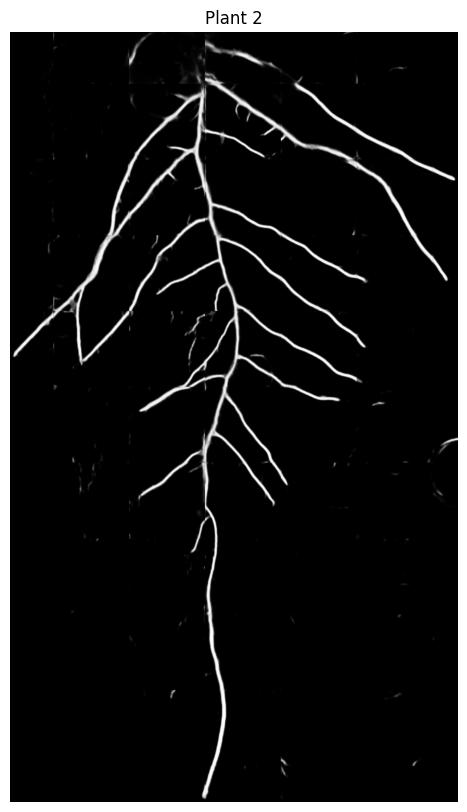

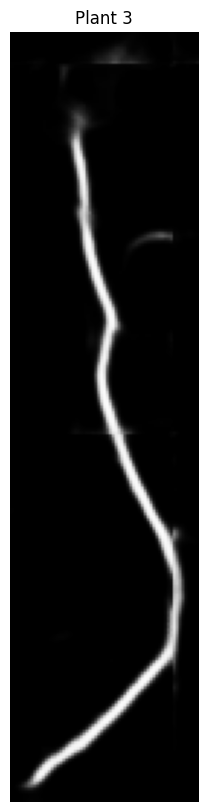

In [7]:
image_path = 'task5_test_image_prediction_emil_231007.png'
color_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closing, connectivity=8)
sorted_stats = sorted(stats[1:], key=lambda x: x[cv2.CC_STAT_AREA], reverse=True)

for i in range(min(4, len(sorted_stats))):
    x, y, w, h, area = sorted_stats[i]
    cropped_image = color_image[y:y+h, x:x+w]
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    display_image(cropped_image_rgb, f"Plant {i}")
